In [1]:
import pickle
import numpy as np
import os

In [2]:
An=pickle.load(open("results.pkl",'rb'))

In [3]:
print(An)

{'/home/maachou/ml/Projet_S4/face-database/jenna dewan/newsml.afp.com.20180916.PH.GTY.1033975770.png': True, '/home/maachou/ml/Projet_S4/face-database/jenna dewan/newsml.afp.com.20180130.PH.GTY.912369222.png': True, '/home/maachou/ml/Projet_S4/face-database/jenna dewan/newsml.afp.com.20180916.PH.GTY.1033978226.png': True, '/home/maachou/ml/Projet_S4/face-database/jenna dewan/newsml.afp.com.20181213.PH-GTY-1081835538.png': True, '/home/maachou/ml/Projet_S4/face-database/jenna dewan/newsml.afp.com.20180519.PH.GTY.959990610.png': True, '/home/maachou/ml/Projet_S4/face-database/jenna dewan/newsml.afp.com.20180502.PH.GTY.953566758.png': True, '/home/maachou/ml/Projet_S4/face-database/jenna dewan/newsml.afp.com.20181111T072154Z.doc-1ar0qg.png': True, '/home/maachou/ml/Projet_S4/face-database/jenna dewan/newsml.afp.com.20180520.PH.GTY.960622458.png': True, '/home/maachou/ml/Projet_S4/face-database/jenna dewan/newsml.afp.com.20180130.PH.GTY.912369014.png': True, '/home/maachou/ml/Projet_S4/fac

In [4]:
import pandas as pd
print(pd.read_csv("test-set.csv"))
folders=pd.read_csv("test-set.csv").values[:,:]
print(folders.shape)
print(folders)


                     Unnamed: 0  Unnamed: 1
0                   jenna dewan          20
1                       william          25
2               gustavo gorriti           5
3                eric musselman          17
4                   diane parry           6
5                 lindsey horan           4
6                   luis ortega           8
7                 marie baeumer           7
8                  madison beer           9
9   miguel angel garcia baquero           3
10                  oscar garre           3
11                 paulo guedes          18
12                 jamie joseph           9
13                  post malone           8
14                princess anne          10
15                 sultan aliev           4
16            thorbjørn jagland           6
17                 tibor gaspar           6
18                   tom cotton           6
19                   tom wilson          27
20                   tony danza           6
21                 ursula meier 

In [5]:

def to_binary(Y):
    Y=np.array(Y)
    nb_clusters=len(set(Y))
    clusters=[]
    majority=None
    nb_points=0
    for i in range(nb_clusters):
        nb=np.sum((Y==i))
        if nb>=nb_points:
            nb_points=nb
            majority=i
    
    Y_binarized=np.array(Y==majority,dtype=int)
    return Y_binarized
        

In [6]:
to_binary(np.array([0,1,1,2,3,2,4,5,3,8,3]))

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [7]:
import face_recognition

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def metrique(model,folders,Database_location,Annotation_dic):
    TP=0
    TN=0
    FP=0
    FN=0
    
    print(folders.shape[0])
    
    
    for i in range(folders.shape[0]):
        
        name=folders[i][0]
        print(name)
        num_pictures=len(os.listdir(Database+folders[i][0]+"/"))
        X=np.zeros((num_pictures,128))
        Y=np.zeros((num_pictures,1))
        k=0
        for photo in os.listdir(Database+folders[i][0]+'/'):
            
            if face_recognition.api.face_encodings(face_recognition.load_image_file(Database+folders[i][0]+"/"+photo))!=[] and np.array(face_recognition.api.face_encodings(face_recognition.load_image_file(Database+folders[i][0]+"/"+photo))).shape[0]!=2: 
                X[k,:]=np.array(face_recognition.api.face_encodings(face_recognition.load_image_file(Database+folders[i][0]+"/"+photo)))
            else:
                print("Cette photo est mal encodé par l'encodeur -> output shape : ",np.array(face_recognition.api.face_encodings(face_recognition.load_image_file(Database+folders[i][0]+"/"+photo))).shape[0])
                display(Image(filename=Database+folders[i][0]+"/"+photo))
            Y[k]=np.array(Annotation_dic[Database+folders[i][0]+"/"+photo],dtype=int)
            k+=1
        
        Y_pred=model.fit_predict(X)
        Y_pred_bin=to_binary(Y_pred).reshape((-1,1))
        confusion=confusion_matrix(Y_pred_bin,Y)
        
        tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
        TP+=tp
        TN+=tn
        FN+=fn
        FP+=fp
        
    accuracy=(TP+TN)/(FP+FN+TP+TN)
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    f1_score=2*(precision*recall)/(precision+recall)
    
    
    print("Accuracy : ",accuracy)
    print("f1_score : ",f1_score)
    
    
        

    return None       
        





49
jenna dewan
william
Cette photo est mal encodé par l'encodeur -> output shape :  0


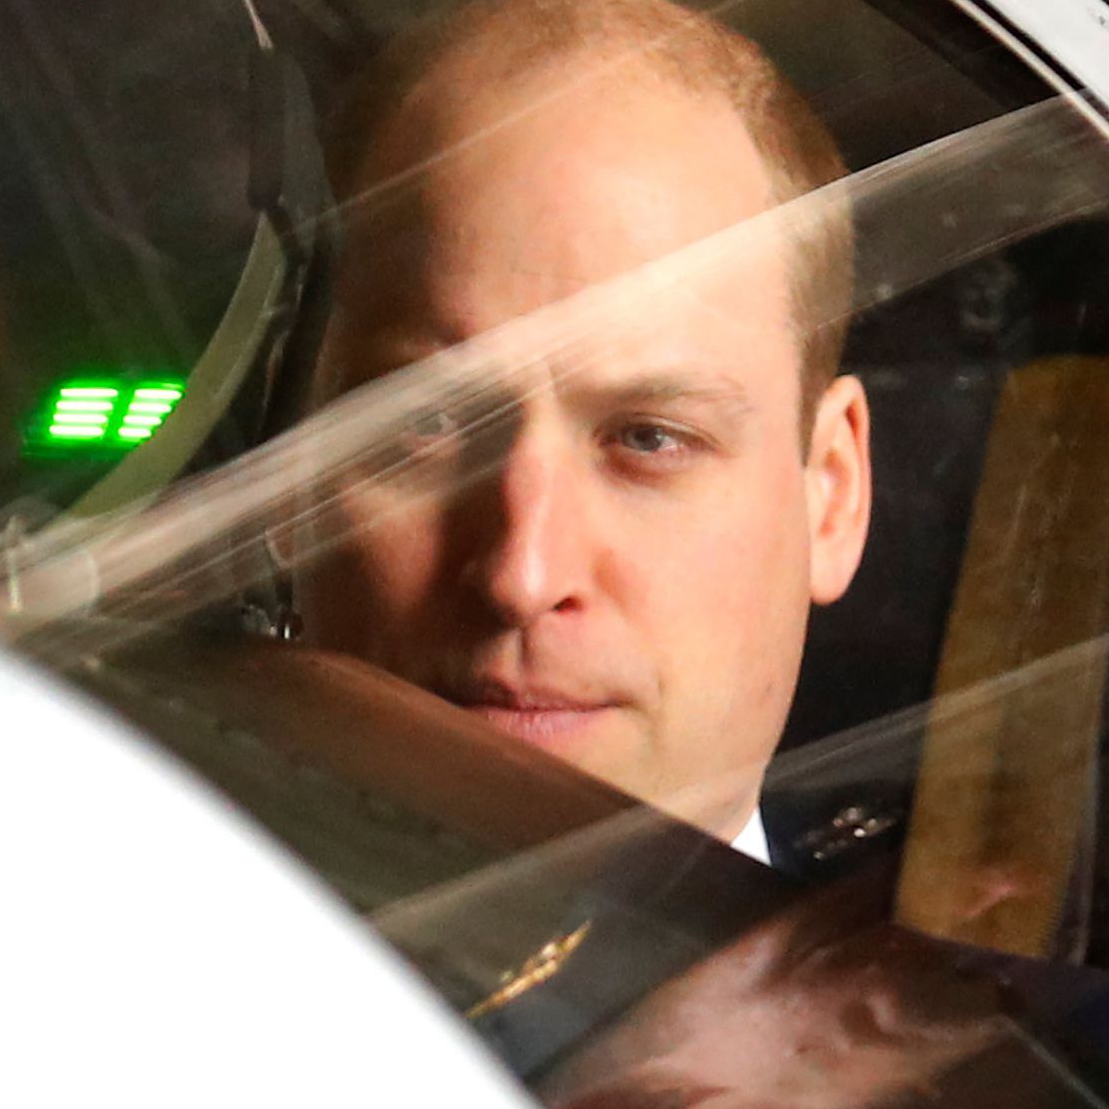

gustavo gorriti


In [ ]:
from sklearn.cluster import estimate_bandwidth
from IPython.display import display, Image


from sklearn.cluster import MeanShift
model=MeanShift()
Database="/home/maachou/ml/Projet_S4/face-database/"
Dict=pickle.load(open("Embedings.pkl",'rb'))

Mean_shift_score=metrique(model,folders,Database,An)
    

In [ ]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=2)
Database="/home/maachou/ml/Projet_S4/face-database/"
Dict=pickle.load(open("Embedings.pkl",'rb'))

KMeans_score=metrique(model,folders,Database,An)

In [ ]:
from sklearn.cluster import DBSCAN
model=DBSCAN()
Database="/home/maachou/ml/Projet_S4/face-database/"
Dict=pickle.load(open("Embedings.pkl",'rb'))

DBSCAN_score=metrique(model,folders,Database,An)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=2)
Database="/home/maachou/ml/Projet_S4/face-database/"
Dict=pickle.load(open("Embedings.pkl",'rb'))

Agglomerative_clustering_score=metrique(model,folders,Database,An)